### [ 882 엄지척 team ]

## 1. 회귀분석 수업 전 가격 예측을 위한 고려사항

### 감가상각 측면
> 연식, 주행거리, 사고유무, 차량CC별 감가율

* (취득원가 - 잔존가치) / 사용연수

### 수요적 측면
> 차량CC별 색상, 연료 Type, Gears 선호도

* 각각의 요소들의 선호도 가중치에 의한 가격 예측 분석
* 차량CC별 구분 (이유 : 색상, 연료 Type, Gears의 선호도가 차량CC별 다를것으로 판단) 

### 기타적 측면 
> CD-player, Powered Window, Quarterly_Tax 등등

* 각각의 기타요소의 추가에 의한 가격 예측 분석

## 2. 분석의 개요 및 목적

  * 분석주제 : 도요타 자동차 모델들의 데이터를 바탕으로 특정 독립변수들을 선택하여 가격이라는 종속변수를 예측하는  분석
  

  * 분석과정 : WorkFlow에 따라 진행
  
              (1) EDA(그래프를 통한 탐색적 자료분석) & 전처리 과정(변수 1차 선택)
                  > 양적변수, 질적변수 구분
                  > 유의미한 변수 선택
                  
              (2) 회귀모형 분석(rmse 값과 pvalue 값으로 변수 2차 선택)
                  > R Square, 각 독립변수의 p-value를 통해 변수 선택
                  > 각 모형의 rmse값으로 성능 비교
                  
              (3) 영향력과 이상치 탐색
                  > 영향력이 높은 이상치 제거
                  > 최종 회귀모형 개선
                  > 최종 회귀모형의 성능 확인(rmse, R Square, p-value)
                

  * 분석모델 : 다중선형회귀

## 3. 탐색적 자료 분석 (EDA : Exploratory Data Analysis) & 전처리(Preprocessing)

### 데이터 가져오기

In [1179]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from statsmodels.stats.stattools import durbin_watson

In [1180]:
# 전체 데이터를 조망하기 위한 컬럼 보기
pd.set_option('display.max_columns', None)

df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# 편리한 변수 탐색을 위해 종속 변수(dfy), 독립 변수(dfX) 분리
dfy = df.iloc[:, :3]
dfX = df.iloc[:, 3:]

dfy_test = df_test.iloc[:, :2]
dfX_test = df_test.iloc[:, 2:]

In [1181]:
# 종속변수(Price)에 영향을 미치는 독립변수들을 훑어보기
dfX.head()

,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0
1,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0
2,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,0
3,25,8,2002,31461,Petrol,192,0,Silver,0,1800,3,4,6,100,1185,1,1,12,1,1,1,1,1,0,1,1,1,1,0,0,0,0,1,0,0,0
4,25,8,2002,32189,Petrol,192,0,Red,0,1800,3,4,6,100,1185,1,1,3,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,0,0,0


In [1182]:
# 변수 형태 / 변수 타입 살펴보기
print df.shape
dfX.dtypes

(1019, 39)


Age_08_04             int64
Mfg_Month             int64
Mfg_Year              int64
KM                    int64
Fuel_Type            object
HP                    int64
Met_Color             int64
Color                object
Automatic             int64
CC                    int64
Doors                 int64
Cylinders             int64
Gears                 int64
Quarterly_Tax         int64
Weight                int64
Mfr_Guarantee         int64
BOVAG_Guarantee       int64
Guarantee_Period      int64
ABS                   int64
Airbag_1              int64
Airbag_2              int64
Airco                 int64
Automatic_airco       int64
Boardcomputer         int64
CD_Player             int64
Central_Lock          int64
Powered_Windows       int64
Power_Steering        int64
Radio                 int64
Mistlamps             int64
Sport_Model           int64
Backseat_Divider      int64
Metallic_Rim          int64
Radio_cassette        int64
Parking_Assistant     int64
Tow_Bar             

In [1183]:
# 기술통계량 확인
# => 질적 변수, 이상치 확인
dfX.describe()

,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
count,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.0,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000
mean,56.041217,5.480864,1999.623160,68177.927380,101.479882,0.669284,0.056919,1579.582924,4.044161,4.0,5.028459,86.405299,1072.262022,0.403337,0.887144,3.810599,0.813543,0.969578,0.717370,0.504416,0.059863,0.283611,0.226693,0.585868,0.567223,0.974485,0.142296,0.261040,0.312071,0.771344,0.196271,0.142296,0.002944,0.278705
std,18.615283,3.304515,1.548589,37966.031948,14.811333,0.470702,0.231801,488.566949,0.954265,0.0,0.166363,39.276282,51.356826,0.490808,0.316572,2.925809,0.389667,0.171830,0.450499,0.500226,0.237349,0.450972,0.418898,0.492813,0.495704,0.157761,0.349525,0.439417,0.463566,0.420173,0.397371,0.349525,0.054206,0.448582
min,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,4.0,5.000000,19.000000,1000.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,3.000000,1998.000000,41567.500000,86.000000,0.000000,0.000000,1400.000000,3.000000,4.0,5.000000,69.000000,1040.000000,0.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,61.000000,5.000000,1999.000000,62280.000000,110.000000,1.000000,0.000000,1600.000000,4.000000,4.0,5.000000,85.000000,1070.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,70.000000,8.000000,2001.000000,86467.500000,110.000000,1.000000,0.000000,1600.000000,5.000000,4.0,5.000000,85.000000,1085.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.000000,5.000000,4.0,6.000000,283.000000,1615.000000,1.000000,1.000000,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1184]:
# 현재 과정을 토대로 양적 변수, 질적 변수 1차 분리
cols_real = ['Age_08_04', 'Mfg_Year', 'KM', 'HP', 'CC', 'Doors', 
             'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Guarantee_Period']

cols_cat = ['Mfg_Month', 'Fuel_Type', 'Met_Color', 'Color', 'Automatic',
            'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2',
            'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
            'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model',
            'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar']

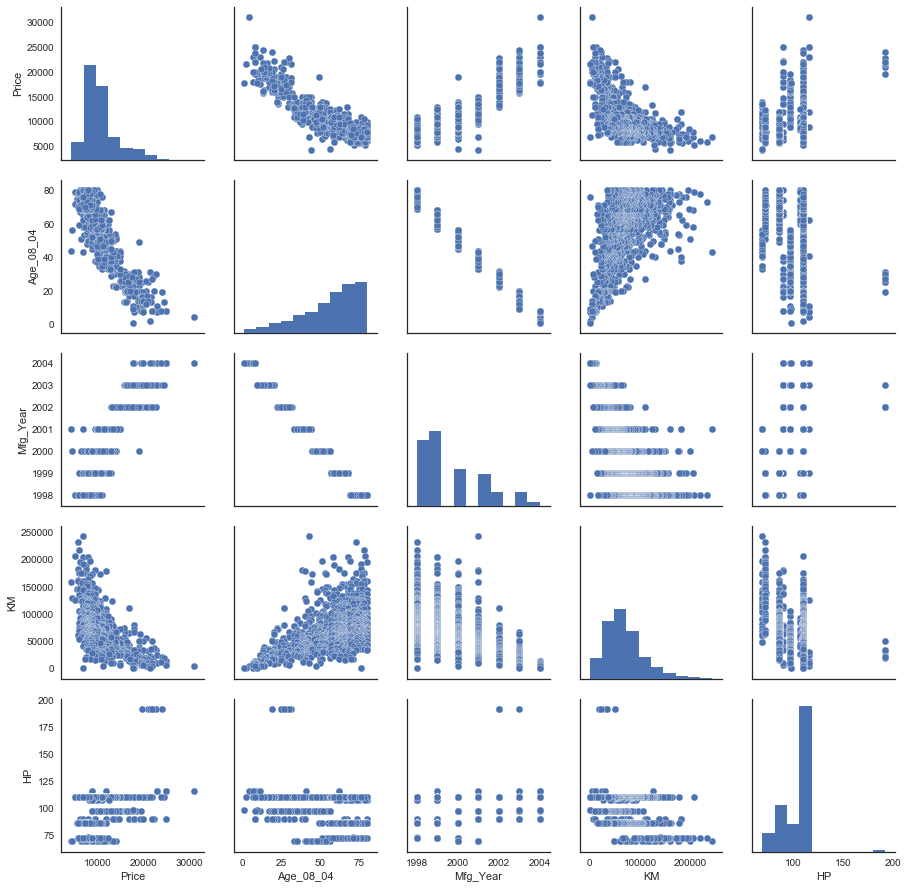

In [1185]:
# 양적변수 산점도 그려보기 / 'Age_08_04', 'Mfg_Year', 'KM', 'HP'
# => 'Age_08_04', 'Mfg_Year', 'KM' 사용, 'HP'는 boxplot으로 재확인

with plt.style.context(('seaborn-white')):
    sns_plot = sns.pairplot(pd.concat([dfy.Price, dfX[cols_real[:4]]], axis=1) ,size=2.5)

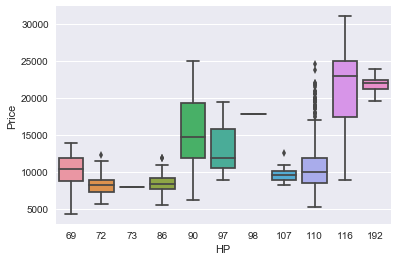

In [1186]:
# HP boxplot
# => 애매하지만, 일단 넣어보기로 함

sns.boxplot(x=df.HP, y=df.Price)

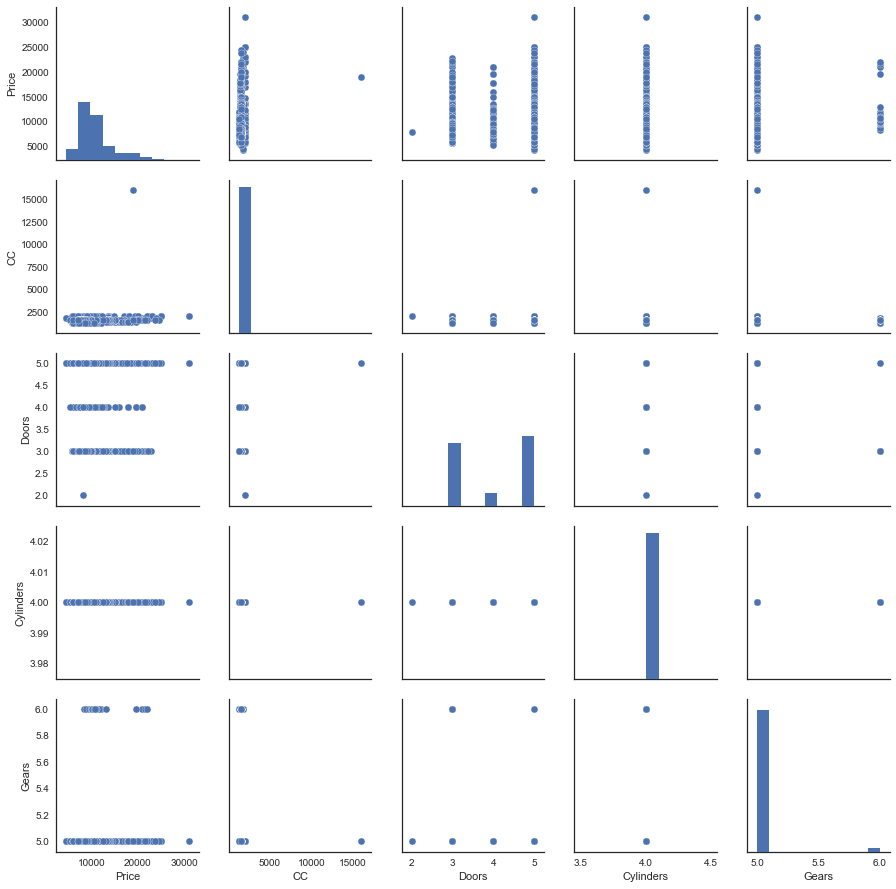

In [1187]:
# 'CC', 'Doors','Cylinders', 'Gears'
# => CC 를 제외한 모든 변수 탈락, CC 는 더 살펴보기로 함

with plt.style.context(('seaborn-white')):
    sns_plot = sns.pairplot(pd.concat([dfy.Price, dfX[cols_real[4:8]]], axis=1) ,size=2.5)

In [1188]:
# CC 이상치 제거 후, 살펴보기(산점도)
df_new = df.copy()
print df_new[df_new['CC'] == 16000].index
df_new = df_new.drop(54)

Int64Index([54], dtype='int64')


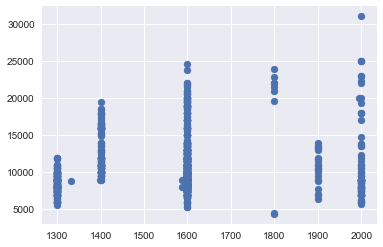

In [1189]:
# => 잘 모르겠으나, 최대치만 보면 선형관계가 있을 것 같아서 boxplot을 그려보기로 함

plt.scatter(df_new.CC, df_new.Price)

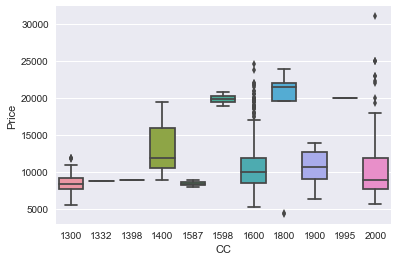

In [1190]:
# CC 이상치 제거 후, boxplot
# => 결과 : CC 에서는 의미를 찾기 어려워보임

sns.boxplot(x=df_new.CC, y=df_new.Price)

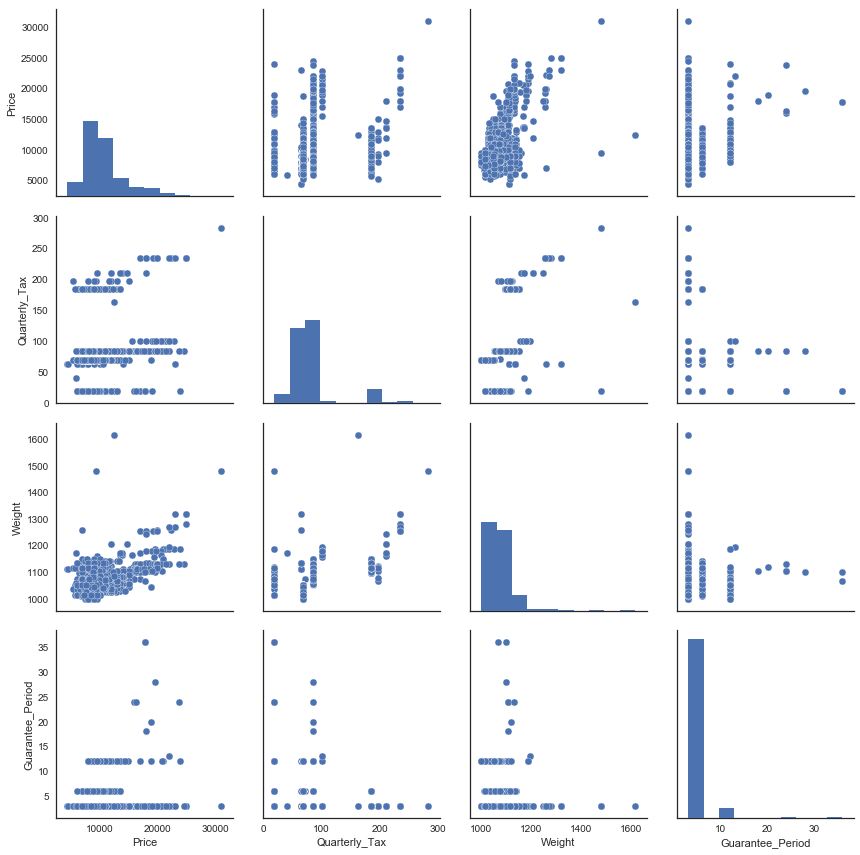

In [1191]:
# 'Quarterly_Tax', 'Weight', 'Guarantee_Period'
# => 'Weight' 는 사용, 'Quarterly_Tax' 와 'Guarantee_Period' 는 boxplot으로 재확인 

with plt.style.context(('seaborn-white')):
    sns_plot = sns.pairplot(pd.concat([dfy.Price, dfX[cols_real[8:]]], axis=1) ,size=3)

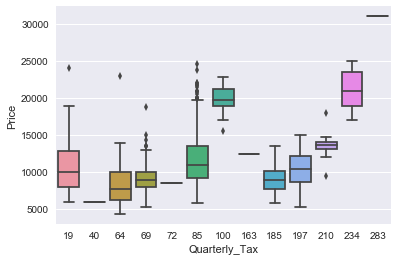

In [1192]:
# 'Quarterly_Tax' boxplot
# => 애매하지만, 일단 넣어보기로 함

sns.boxplot(x=df.Quarterly_Tax, y=df.Price)

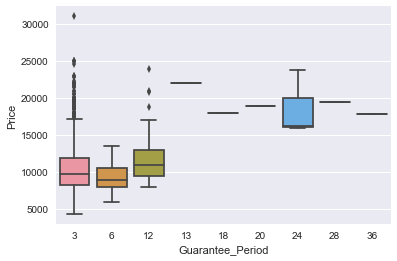

In [1193]:
# 'Guarantee_Period' boxplot
# => 애매하지만, 일단 넣어보기로 함

sns.boxplot(x=df.Guarantee_Period, y=df.Price)

In [1194]:
# 질적변수 boxplot 그려보기

cols_cat = ['Mfg_Month', 'Fuel_Type', 'Met_Color', 'Color', 'Automatic',
            'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2',
            'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
            'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model',
            'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar']

In [1195]:
def display_multi_boxplots(start_feature_name, row, col):
    with plt.style.context(('seaborn-white')):
        f, axes = plt.subplots(row, col, figsize=(2.3*col, 3.5*row), sharey=True)

        nums = row*col
        start_idx = cols_cat.index(start_feature_name)

        for num, ax in zip(range(nums), axes.flat):
            try:
                sns.boxplot(x=dfX[cols_cat[start_idx + num]], y=dfy['Price'], palette="Set3", ax=ax)
            except:
                pass

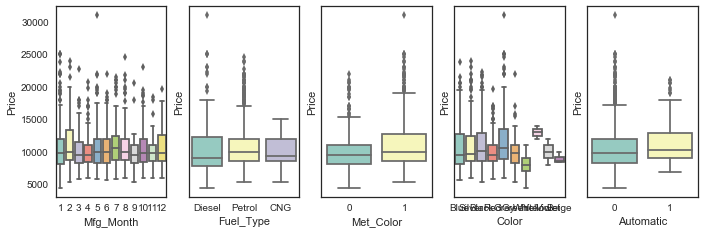

In [1196]:
# 'Mfg_Month', 'Fuel_Type', 'Met_Color', 'Color', 'Automatic'
# => 잘 모르겠음
display_multi_boxplots('Mfg_Month', 1, 5)

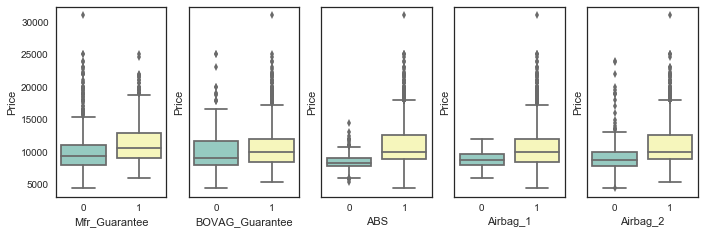

In [1197]:
# 'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2'
# => 'ABS', 'Airbag_1', 'Airbag_2' 은 의미가 있어 보임
display_multi_boxplots('Mfr_Guarantee', 1, 5)

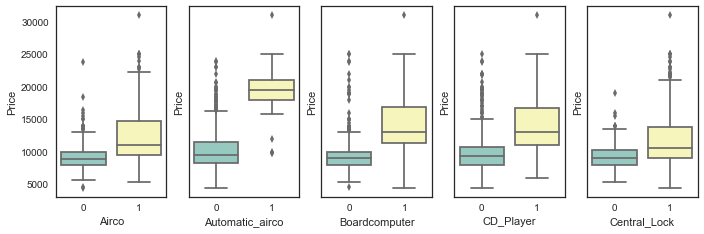

In [1198]:
# 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock'
# => 모두 의미가 있어 보임
display_multi_boxplots('Airco', 1, 5)

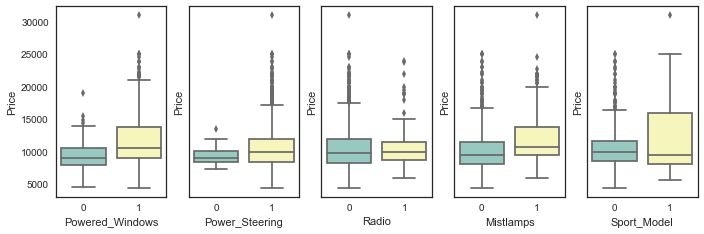

In [1199]:
# 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model'
# => 'Powered_Windows', 'Mistlamps', 'Sport_Model' 은 의미가 있어 보임
display_multi_boxplots('Powered_Windows', 1, 5)

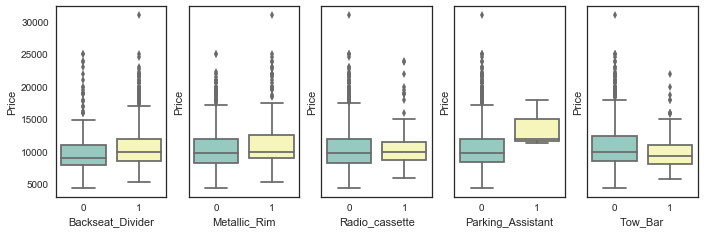

In [1200]:
# 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'
# => 'Parking_Assistant' 은 의미가 있어 보임
display_multi_boxplots('Backseat_Divider', 1, 5)

In [1201]:
# 유의미한 양적변수 선택
# => 'Age_08_04', 'Mfg_Year', 'KM', 'HP','Quarterly_Tax', 'Weight', 'Guarantee_Period'
# 7개

cols_real = ['Age_08_04', 'Mfg_Year', 'KM', 'HP','Quarterly_Tax', 'Weight', 'Guarantee_Period']

# 유의미한 질적변수 선택
# => 'ABS', 'Airbag_1', 'Airbag_2','Airco', 'Automatic_airco', 'Boardcomputer',
#    'CD_Player', 'Central_Lock','Powered_Windows', 'Mistlamps', 'Sport_Model', 'Parking_Assistant'
# 12개

cols_cat = ['ABS', 'Airbag_1', 'Airbag_2','Airco', 'Automatic_airco', 'Boardcomputer',
            'CD_Player', 'Central_Lock','Powered_Windows', 'Mistlamps', 'Sport_Model', 'Parking_Assistant']

### 양적변수들 상관관계 그래프로 보기

In [1202]:
df_corr = pd.concat([dfy.Price, dfX[cols_real]], axis=1)
df_corr.head()

,Price,Age_08_04,Mfg_Year,KM,HP,Quarterly_Tax,Weight,Guarantee_Period
0,13500,23,2002,46986,90,210,1165,3
1,13750,23,2002,72937,90,210,1165,3
2,13750,30,2002,38500,90,210,1170,3
3,20950,25,2002,31461,192,100,1185,12
4,19600,25,2002,32189,192,100,1185,3


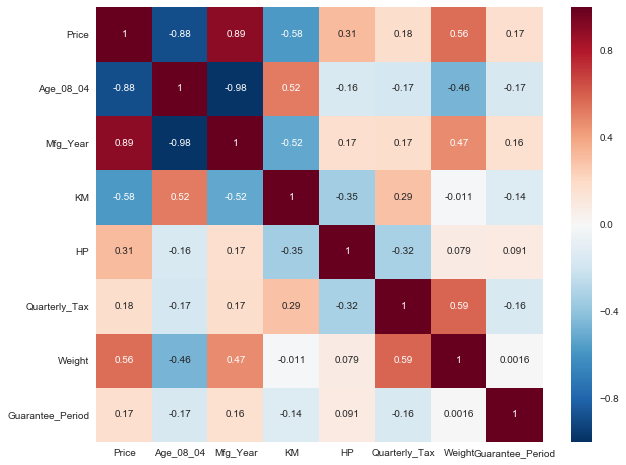

In [1203]:
# => 'Age_08_04'와 'Mfg_Year'의 상관관계가 높아 보임. 둘 중 하나를 선택.
# => 'Price'와의 관계를 볼 때, 'Quarterly_Tax', 'Guarantee_Period'는 상관관계가 낮음.
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True)

## 4. 회귀모형 분석

In [1204]:
cols_real = ['Age_08_04', 'Mfg_Year', 'KM', 'HP','Quarterly_Tax', 'Weight', 'Guarantee_Period']

cols_cat = ['ABS', 'Airbag_1', 'Airbag_2','Airco', 'Automatic_airco', 'Boardcomputer',
            'CD_Player', 'Central_Lock','Powered_Windows', 'Mistlamps', 'Sport_Model', 'Parking_Assistant']

cols_sum = cols_real + cols_cat

def cols_to_str(cols):

    cols_new = ''
    cols_new += cols[0]
    
    for i in cols[1:]:
        cols_new += '+' + i
    
    return cols_new

In [1205]:
# 전체 변수 보기
cols = cols_to_str(cols_sum)
model = smf.ols(formula = 'Price ~' + cols, data=df).fit()
print model.summary()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     481.9
Date:                Fri, 30 Jun 2017   Prob (F-statistic):               0.00
Time:                        12:47:54   Log-Likelihood:                -8612.4
No. Observations:                1019   AIC:                         1.726e+04
Df Residuals:                     999   BIC:                         1.736e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.389e+06   2.68e+0

In [1206]:
# rmse
predict = model.predict(dfX)
print np.sqrt(metrics.mean_squared_error(predict, dfy.Price))

1133.27553781


In [1207]:
cols_minus = ['Age_08_04', 'Airbag_1', 'Airbag_2', 'Boardcomputer', 'Central_Lock', 'Mistlamps', 'Parking_Assistant']
cols_predict1 = list(set(cols_final)-set(cols_minus))

In [1208]:
# 1차 변수 제거
cols = cols_to_str(cols_predict1)
model_1 = smf.ols(formula = 'Price ~' + cols, data=df).fit()
print model_1.summary()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     804.0
Date:                Fri, 30 Jun 2017   Prob (F-statistic):               0.00
Time:                        12:47:54   Log-Likelihood:                -8631.9
No. Observations:                1019   AIC:                         1.729e+04
Df Residuals:                    1007   BIC:                         1.735e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2.781e+06   8.14e+04  

In [1209]:
# rmse
predict_1 = model_1.predict(dfX)
print np.sqrt(metrics.mean_squared_error(predict_1, dfy.Price))

1155.21135474


In [1210]:
cols_minus = ['CD_Player']
cols_predict2 = list(set(cols_predict1)-set(cols_minus))

In [1211]:
# 2차 변수 제거
cols = cols_to_str(cols_predict2)
model_2 = smf.ols(formula = 'Price ~' + cols, data=df).fit()
print model_2.summary()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     882.7
Date:                Fri, 30 Jun 2017   Prob (F-statistic):               0.00
Time:                        12:47:54   Log-Likelihood:                -8633.3
No. Observations:                1019   AIC:                         1.729e+04
Df Residuals:                    1008   BIC:                         1.734e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2.827e+06   7.62e+04  

In [1212]:
# rmse
predict_2 = model_2.predict(dfX)
print np.sqrt(metrics.mean_squared_error(predict_2, dfy.Price))

1156.73222089


In [1213]:
cols_plus = ['Boardcomputer', 'CD_Player']
cols_predict3 = cols_predict2 + cols_plus

In [1214]:
# 3차 변수 추가
cols = cols_to_str(cols_predict3)
model_3 = smf.ols(formula = 'Price ~' + cols, data=df).fit()
print model_3.summary()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     738.6
Date:                Fri, 30 Jun 2017   Prob (F-statistic):               0.00
Time:                        12:47:54   Log-Likelihood:                -8630.5
No. Observations:                1019   AIC:                         1.729e+04
Df Residuals:                    1006   BIC:                         1.735e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2.869e+06   9.68e+04  

In [1215]:
# rmse
predict_3 = model_3.predict(dfX)
print np.sqrt(metrics.mean_squared_error(predict_3, dfy.Price))

1153.59510321


In [1216]:
cols_minus = ['Boardcomputer']
cols_predict4 = list(set(cols_predict3)-set(cols_minus))

In [1217]:
# 4차 변수 제거
cols = cols_to_str(cols_predict4)
model_4 = smf.ols(formula = 'Price ~' + cols, data=df).fit()
print model_4.summary()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     804.0
Date:                Fri, 30 Jun 2017   Prob (F-statistic):               0.00
Time:                        12:47:54   Log-Likelihood:                -8631.9
No. Observations:                1019   AIC:                         1.729e+04
Df Residuals:                    1007   BIC:                         1.735e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2.781e+06   8.14e+04  

In [1218]:
# rmse
predict_4 = model_4.predict(dfX)
print np.sqrt(metrics.mean_squared_error(predict_4, dfy.Price))

1155.21135474


In [1219]:
# model_3 선택
model_final = model_3
cols_final = cols_predict3

### => Adj. R-squared :  0.900 / RMSE : 1137.25996904

## 5. 영향력과 이상치 탐색

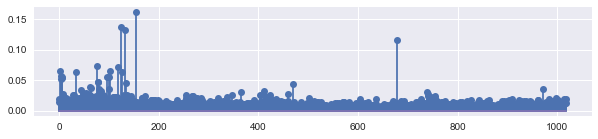

In [1220]:
# 레버리지는 실제의 결과값(y)이 예측값(y_hat)에 미치는 영향, 즉 예측점을 자기 자신의 위치로 끌어 당기는 정도를 나타낸 것이다.
influence = model_final.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.show()

In [1221]:
print("hat.sum() =", hat.sum())

('hat.sum() =', 13.000000000000291)


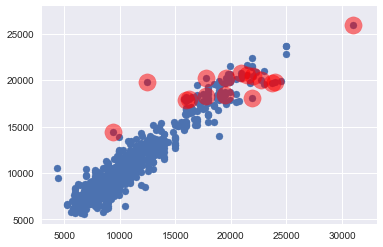

In [1222]:
X = dfy.Price
y = model_final.predict()
plt.scatter(X, y)

idx = hat > 0.05
plt.scatter(X[idx], y[idx], s=300, c="r", alpha=0.5)
plt.show()

<Container object of 3 artists>

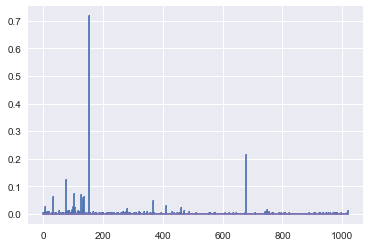

In [1223]:
# c is the distance and p is p-value
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")

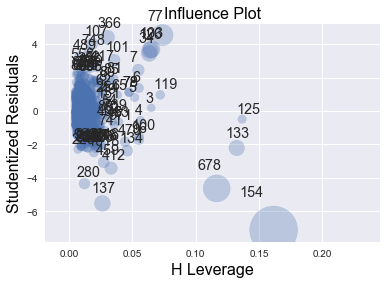

In [1224]:
sm.graphics.influence_plot(model_final, plot_alpha=0.3)
plt.show()

In [1225]:
leverage_out = list(dfX[idx].index)
print leverage_out

[3, 4, 5, 6, 7, 34, 77, 96, 100, 103, 119, 125, 126, 133, 154, 678]


In [1226]:
student_resid = model_final.outlier_test()['student_resid']
student_resid_out = list(student_resid[student_resid > 3].index) + list(student_resid[student_resid < -3].index)
print student_resid_out

[34, 77, 101, 103, 107, 126, 366, 489, 748, 137, 154, 280, 412, 459, 678]


In [1227]:
final_outlier = list(set(student_resid_out + leverage_out))
print final_outlier

[3, 4, 5, 6, 7, 137, 280, 154, 412, 133, 34, 678, 459, 77, 96, 100, 101, 103, 489, 107, 748, 366, 119, 125, 126]


In [1228]:
df_new = df.copy()
df_new = df_new.drop(final_outlier)

In [1229]:
cols = cols_to_str(cols_final)
model_new = smf.ols(formula = 'Price ~' + cols, data=df_new).fit()
print model_new.summary()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     854.2
Date:                Fri, 30 Jun 2017   Prob (F-statistic):               0.00
Time:                        12:48:03   Log-Likelihood:                -8263.6
No. Observations:                 994   AIC:                         1.655e+04
Df Residuals:                     981   BIC:                         1.662e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2.682e+06    8.6e+04  

In [1230]:
# rmse
predict_new = model_new.predict(df_new)
print np.sqrt(metrics.mean_squared_error(predict_new, df_new.Price))

986.889196633


In [1231]:
# 변수 다시 제거해보기
cols_minus = ['Boardcomputer']
cols_new_1 = list(set(cols_final)-set(cols_minus))

In [1232]:
cols = cols_to_str(cols_new_1)
model_new_1 = smf.ols(formula = 'Price ~' + cols, data=df_new).fit()
print model_new_1.summary()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     932.3
Date:                Fri, 30 Jun 2017   Prob (F-statistic):               0.00
Time:                        12:48:03   Log-Likelihood:                -8263.8
No. Observations:                 994   AIC:                         1.655e+04
Df Residuals:                     982   BIC:                         1.661e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2.652e+06   7.22e+04  

In [1233]:
# rmse
predict_new_1 = model_new_1.predict(df_new)
print np.sqrt(metrics.mean_squared_error(predict_new_1, df_new.Price))

987.096478538


In [1234]:
# model_new_1 선택
model_final = model_new_1
cols_final = cols_new_1

### => Adj. R-squared : 0.912 / RMSE : 987.096478538

## 6. 회귀모형 가정의 진단 (잔차분석)

### 정규성

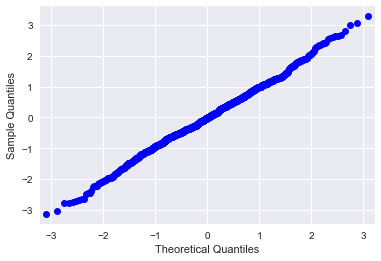

In [1235]:
sm.qqplot(model_final.resid, fit=True);
plt.show();

In [1236]:
sp.stats.normaltest(model_final.resid)

NormaltestResult(statistic=2.5422031878562956, pvalue=0.28052242970232089)

### 등분산성

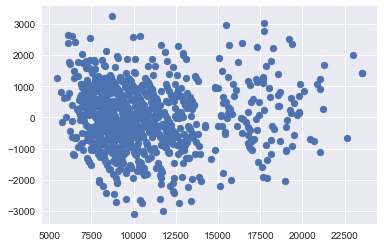

In [1237]:
plt.scatter(model_final.predict(), model_final.resid)

### 독립성

In [1238]:
durbin_watson(model_final.resid)

1.8316871560319183

## 7. 다중공선성

In [1239]:
df_corr = pd.concat([df_new.Price, df_new[cols_final]], axis=1)
df_corr.head()

,Price,CD_Player,Weight,HP,KM,Sport_Model,Mfg_Year,Guarantee_Period,ABS,Automatic_airco,Powered_Windows,Airco
0,13500,0,1165,90,46986,0,2002,3,1,0,1,0
1,13750,1,1165,90,72937,0,2002,3,1,0,0,1
2,13750,0,1170,90,38500,0,2002,3,1,0,1,1
8,17950,0,1105,110,21716,0,2002,18,1,0,1,1
9,16950,1,1105,110,64359,1,2002,3,1,0,1,1


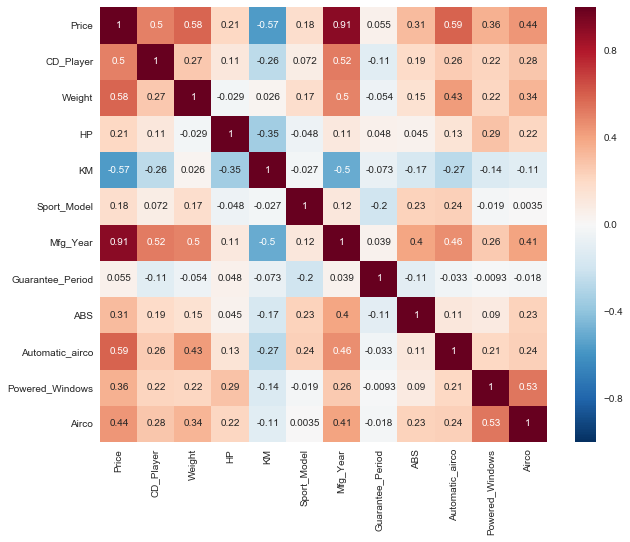

In [1240]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True)

## 8. 교차 검증 (Cross Validation)

In [1241]:
model = linear_model.LinearRegression()
scores = cross_val_score(model, df_new[cols_final], df_new.Price, cv=5)
print scores
print scores.mean()

[ 0.61541297  0.42013235  0.3782388   0.57077557 -0.10468996]
0.375973946627


## 9. 최종 회귀모형 결정

In [1242]:
y_hat = model_final.predict(dfX_test)
df_test['Price'] = y_hat
df_test[['Id','Price']].to_csv('882.csv')
df_final = pd.read_csv("882.csv")
df_final.head()

,Unnamed: 0,Id,Price
0,0,3,14906.136035
1,1,4,14789.178740
2,2,6,15339.504349
3,3,7,16222.036745
4,4,8,16442.767515
